## （1）为什么神经网络能很好的工作？

通用定理（universal approximation theorem）是理论基础

In [2]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from utils import *
from experiments import *
import warnings
pretty_plotting_styles()
timer = Timer()

%load_ext autoreload
%autoreload 2
%matplotlib inline$

**方法:**
我们训练一个一层侧神经网络，使用50个数据点 $(x,y)$ 
然后在 $[-1,1]$区间拟合三种函数：
* $f(x) = \sin(12x)$
* $g(x) = -2x^4 + x^3 + x^2 - 2x + 0$
* $h(x) = \lvert x \rvert$

然后用最小平方差(mean square error，MSE) 也来衡量拟合误差。

拟合耗时2分钟！

**需要GPU等加速设备**

/home/ai/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Time needed to run experiment: 65.116 s


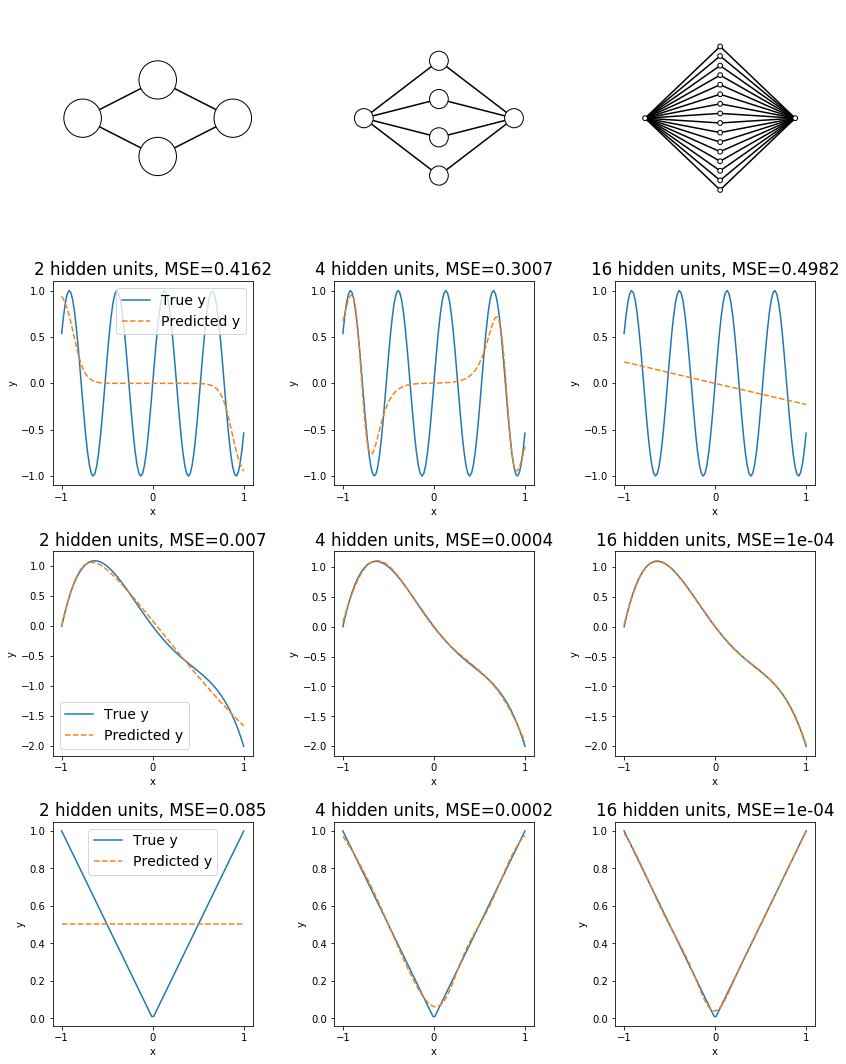

In [3]:
functions = [sin(omega=12),
             polynomial([0,-2,1,1,-2]),
             np.abs]
n_hidden_units = [2,4,16] 
experiment = Experiment1()

f, axs = plt.subplots(4,3,figsize=(12,15))
plt.rc("font",family="sans-serif",size=14)

for i, n_hidden in enumerate(n_hidden_units):
    ax = axs[0, i]
    ax.axis('off')
    draw_neural_net(ax, .15, .9, .1, .85, [1, n_hidden, 1])


experiment.initialize()
plot_idx = 1
for i, function in enumerate(functions):
    for j, n_hidden in enumerate(n_hidden_units):
        x_values, y_values, y_pred, loss = experiment.run(n_hidden=n_hidden, function=function, verbose=False)
        ax = axs[i+1, j]
        ax.plot(x_values, y_values, '-',label='True y')
        ax.plot(x_values, y_pred, '--',label='Predicted y')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        if (j==0):
            ax.legend()
        ax.set_title(str(n_hidden)+' hidden units, MSE='+str(np.round(loss,4)))
        
plt.tight_layout()
experiment.conclude()

## (2)为什么网络结构越深越好？

Time needed to run experiment: 50.323 s


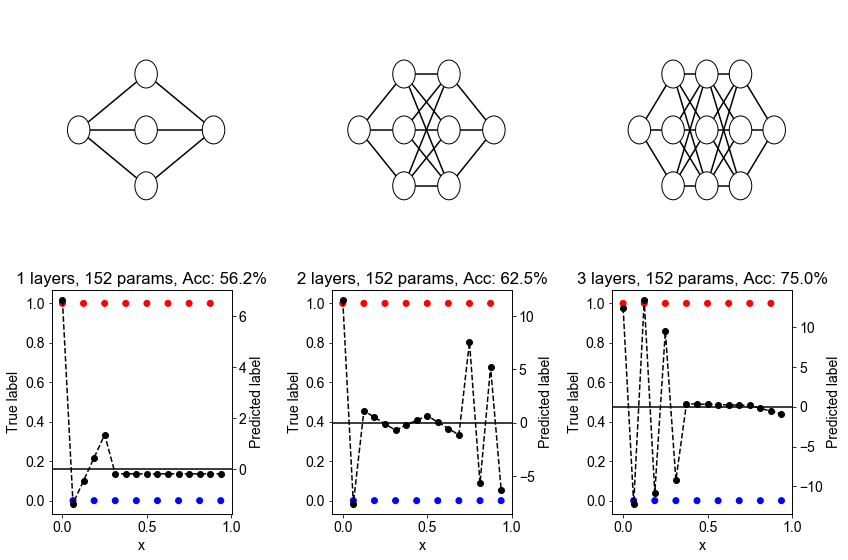

In [5]:
experiment = Experiment2()
experiment.initialize()

n_hidden_units = [[10],[10,10],[10,10,10]]

f, axs = plt.subplots(2,3,figsize=(12,8))
plt.rc("font",family="sans-serif",size=14)

for i, n_hidden in enumerate(n_hidden_units):
    ax = axs[0, i]
    ax.axis('off')
    draw_neural_net(ax, .15, .9, .1, .85, [1] + [3]*len(n_hidden) + [1]) #10 hidden units per layer becomes too crowded

for i, n_hidden in enumerate(n_hidden_units):
    ax = axs[1, i]
    x_values,y_values,y_pred,loss,accuracy,n_params = experiment.run(n=16, n_hidden = n_hidden)
    ax.set_title(str(len(n_hidden))+' layers, '+str(n_params)+' params, Acc: '+str(np.round(100*accuracy,1))+'%')
    ax.set_xlabel('x')
    ax.set_ylabel('True label')
    ax.scatter(x_values, y_values[:,1], marker='o',c=y_values[:,1],cmap='bwr',label='Predicted y')
    ax2 = ax.twinx()
    ax2.plot(x_values, y_pred[:,1]-y_pred[:,0], 'k--o',label='Predicted y')
    ax2.axhline(0, color='k', ls='-')
    ax2.set_ylabel('Predicted label')

plt.tight_layout()
experiment.conclude()

## (3) 为什么数据越多越好

**大数据**
（1）能治疗过拟合

（2）大数据能够让网络充分表达


Time needed to run experiment: 151.227 s


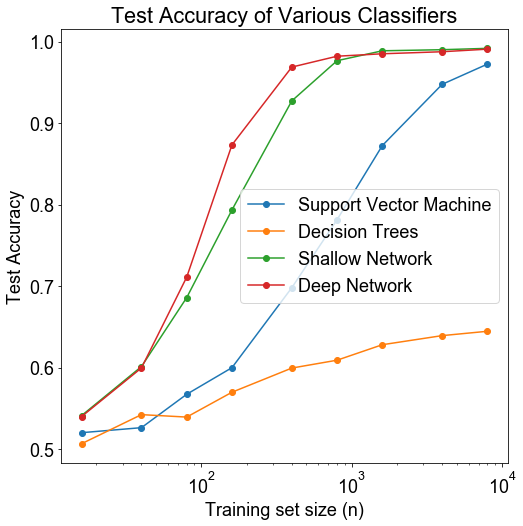

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

ns = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
test_size=0.2; train_size=1-test_size

class_seps = [1/(i+1) for i in range(12)]

classifiers = [SVC(),
               DecisionTreeClassifier(),
               MLPClassifier(),
               MLPClassifier(hidden_layer_sizes=(100,100)),
              ]

classifier_names = ['Support Vector Machine',
                    'Decision Trees',
                    'Shallow Network',
                    'Deep Network']

experiment = Experiment3()
experiment.initialize()

plt.figure(figsize=[8,8]); plt.rc("font",family="sans-serif",size=18)
accuracies = experiment.run(ns=ns,classifiers=classifiers,class_seps=class_seps,d=12,iters=3, test_size=test_size)
plt.title('Test Accuracy of Various Classifiers')
plt.plot(train_size*np.array(ns), np.mean(accuracies,axis=2), '-o')
plt.xlabel('Training set size (n)')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(classifier_names)

experiment.conclude()

## （4）非线性激活函数能显著影响拟合效果吗？

**Method**: We generate the famous two-dimensional moons dataset, and train a neural network with 2 hidden layers to learn to classify the dataset. We try 7 different activation functions:

* $ f(x) = \text{ReLU}(x) $
* $ f(x) = \tanh(x) $
* $ f(x) = x^2 $
* $ f(x) = \sin(x) $
* $ f(x) = \text{sign}(x) $
* $ f(x) = x $

**Hypothesis**: We would expect that the identity function to perform poorly (as the network remains quite linear until the last softmax layer). We might further expect that the standard activation functions to perform the best.

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


Time needed to run experiment: 31.349 s


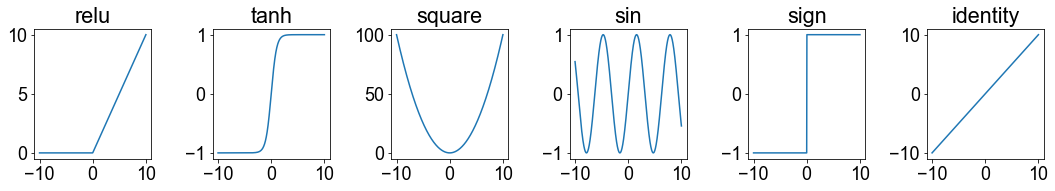

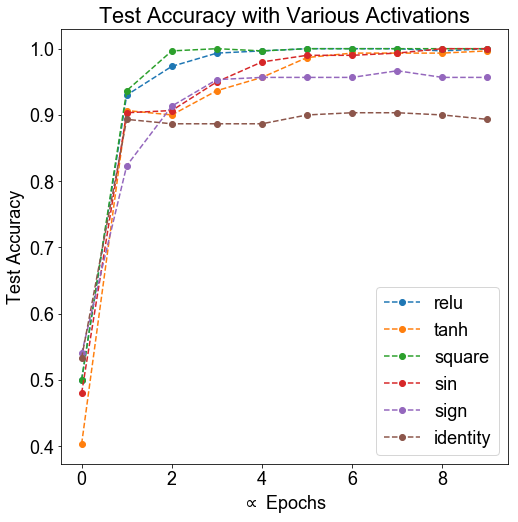

In [10]:
experiment = Experiment7()
experiment.initialize()

activations = [tf.nn.relu, tf.tanh, tf.square, tf.sin, tf.sign, tf.identity]
x = np.linspace(-10,10,1000)

accuracies = experiment.run(activations=activations, 
                            iters=3)


fig, axs = plt.subplots(1, 6, figsize=[15,3])
sess = tf.Session()
for i, ax in enumerate(axs):
    ax.plot(x, sess.run(activations[i](x)))
    ax.set_title(activations[i].__name__)
plt.tight_layout()

plt.figure(figsize=[8,8]); plt.rc("font",family="sans-serif",size=18)
plt.plot(np.mean(accuracies,axis=0), '--o')

plt.title('Test Accuracy with Various Activations')
plt.xlabel(r'$\propto$ Epochs')
plt.ylabel('Test Accuracy')
plt.legend([a.__name__ for a in activations])

experiment.conclude()

**Conclusion**: All of the non-linear activation functions besides $\text{sign}(x)$ are quite effective for this classification task. 

**Discussion**: The results are somewhat surprising since all of the functions are about equally effective. In fact, symmetric activation functions, like $x^2$ seem to be performing as well as $\text{ReLUs}$! There are a couple of reasons we should be careful about extrapolating too much from this experiment. For one, this is a relatively shallow neural network. Activation functions that are good for this kind of network may be very different than those that are good for deeper networks. Furthermore, this task may have been too easy -- as even the almost completely linear neural network ($f(x) = x$) achieves about 88% accuracy!

## TensorFlow实践之MNIST


In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [10]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)


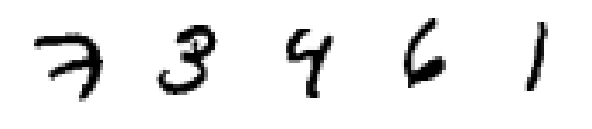

In [11]:
n_samples = 5
plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = mnist.train.images[index].reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
#    plt.imshow(sample_image, cmap='gray')
    plt.axis("off")

plt.show()

## 实现版本1: CNN-mnist


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 27 21:51:56 2017

@author: yhilly
"""
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
  

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


sess.run(tf.global_variables_initializer())
for i in range(10000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
        x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

sess.close()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.8
step 200, training accuracy 0.88
step 300, training accuracy 0.94
step 400, training accuracy 0.88
step 500, training accuracy 0.98
step 600, training accuracy 0.96
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.96
step 1300, training accuracy 0.96
step 1400, training accuracy 1
step 1500, training accuracy 1
step 1600, training accuracy 1
step 1700, training accuracy 1
step 1800, training accuracy 0.94
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.96
step 2200, training accuracy 0.96
step 2300, training accuracy 0.96
step 2400, training a